# Education Project

The following project is meant to utilize the data science methodology to determine if student performance on the ACT test is correlated to socioeconomic factors, the type of school the students are attending (e.g. private, public, etc.), and whether the students' school receives Title I funding. This correlation is examined by combining three different datasets, pairing their shared values to one another, and visualizing correlative relationships between the various factors involved. This requires the usage of both Python techniques and various visualization tools.

The data on ACT scores and socioeconomic factors is sourced from EdGap.org and covers over 7,000 US schools from the 2016-2017 school year. EdGap is an organization mapping the disparity in education outcomes across 20 states. The other two datasets on school type and Title I status feature a variety of key information about over 100,000 United States schools and are also from the 2016-2017 school year. They are derived from the National Center for Education Statistics (NCES).

Links to each dataset are listed below:

ACT scores/socioeconomic factors: https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx

school type dataset: https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx

Title I status dataset: https://nces.ed.gov/ccd/pubschuniv.asp#:~:text=Flat%20and%20SAS%20File%0A(ZIP%204.4%20MB)


## Import necessary libraries

In [309]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Import csv files for each data set and create a dataframe for each

Each dataset of interest will be uploaded and converted into a Pandas DataFrame that can be examined and manipulated.

In [310]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [312]:
school_information = pd.read_csv('/Users/jacobwilson/education/data/ccd_sch_029_1617_w_1a_11212017 (1).csv', encoding='unicode_escape'
                                )

/var/folders/l4/9vdd4nyn6b5_3fpx0txllwww0000gn/T/ipykernel_10731/3091787904.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('/Users/jacobwilson/education/data/ccd_sch_029_1617_w_1a_11212017 (1).csv', encoding='unicode_escape'


In [314]:
school_characteristics = pd.read_csv('/Users/jacobwilson/Downloads/ccd_sch_129_1617_w_1a_11212017/ccd_sch_129_1617_w_1a_11212017.csv', encoding='unicode_escape')

## Inspect contents of datasets

Below, the ``info`` command is used to view the number of rows and columns within each dataset, as well as how many missing values are present.

In [318]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [319]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

In [320]:
school_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100062 entries, 0 to 100061
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SCHOOL_YEAR         100062 non-null  object 
 1   FIPST               100062 non-null  int64  
 2   STATENAME           100062 non-null  object 
 3   ST                  100062 non-null  object 
 4   SCH_NAME            100062 non-null  object 
 5   STATE_AGENCY_NO     100062 non-null  int64  
 6   UNION               2488 non-null    float64
 7   ST_LEAID            100062 non-null  object 
 8   LEAID               100062 non-null  int64  
 9   ST_SCHID            100062 non-null  object 
 10  NCESSCH             100062 non-null  int64  
 11  SCHID               100062 non-null  int64  
 12  SHARED_TIME         100062 non-null  object 
 13  TITLEI_STATUS       100062 non-null  object 
 14  TITLEI_STATUS_TEXT  100062 non-null  object 
 15  MAGNET_TEXT         100062 non-nul

The dataframes differ dramatically in terms of rows, with the education gap dataset contatining data on substantially less schools than either the school information or school characteristics datasets. Additionally, there are some missing values for variables of interest present in both the education gap and school information datasets.

## Data preparation

The variables of interest from the NCES datasets include things such as school type, whether or not the school is a charter school, and whether or not the school is a Title I school receiving federal funding. The code blocks below filter each dataframe for only the variables of interest.

In [321]:
school_information = school_information[
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [322]:
school_characteristics = school_characteristics[
    ['NCESSCH', 'TITLEI_STATUS_TEXT']
]

All of the columns within the EdGap data, however, represent variables of interest that will be necessary to examine later. Additionally, each of the three dataframes will require renaming the columns for greater readability.

In [323]:
edgap = edgap.rename(
    columns={
        'NCESSCH School ID': 'school_id',
        'CT Pct Adults with College Degree': 'percent_college',
        'CT Unemployment Rate': 'rate_unemployment',
        'CT Pct Childre In Married Couple Family': 'percent_married',
        'CT Median Household Income': 'median_income',
        'School ACT average (or equivalent if SAT score)': 'average_act',
        'School Pct Free and Reduced Lunch': 'percent_lunch',
    }
)

In [324]:
school_information = school_information.rename(
    columns={
        'SCHOOL_YEAR': 'year',
        'NCESSCH': 'school_id',
        'LSTATE': 'state',
        'LZIP': 'zip_code',
        'SCH_TYPE_TEXT': 'school_type',
        'LEVEL': 'school_level',
        'CHARTER_TEXT': 'charter'
    }
)

In [325]:
school_characteristics = school_characteristics.rename(
    columns={
        'NCESSCH': 'school_id',
        'TITLEI_STATUS_TEXT': 'title_i_status'
    }
)

Each dataset is now renamed for greater readability. Note first that the education gap data specifies that its data on percent of adults with a college degree, unemployment rate, percent of children from married families, and median household income are all derived from census data. This data does not necessarily reflect the realities of the children within the schools from the dataset.

Additionally, note that each dataset contained a NCES ID code for each school within their respective dataframe. By matching the column names, the data can be merged between the three based on this shared column. Prior to this, however, each column will have to possess the same data type across the three sets.

In [326]:
#using identity of the school as the key (NCESSCH); its values are objects in edgap and floats in school information
school_information['school_id'] = school_information['school_id'].astype('object') #changing data type to object

In [327]:
school_characteristics['school_id'] = school_characteristics['school_id'].astype('object')

The three dataframes now contain exclusively objects within the column ``school_id`` and can now be merged.

## Join dataframes

First, a left join will be performed to merge the two NCES datasets. The join will lose data on around 2,000 schools from the ``school_information`` dataset. 

In [328]:
school_info = school_characteristics.merge(
    school_information,
    how='left',
    on='school_id'
)

In [329]:
school_info.head()

,school_id,title_i_status,year,state,zip_code,school_type,school_level,charter
0,10000200277,Not a Title I school,2016-2017,AL,35220,Alternative School,High,No
1,10000201667,Not a Title I school,2016-2017,AL,36067,Alternative School,High,No
2,10000201670,Not a Title I school,2016-2017,AL,36784,Alternative School,High,No
3,10000201705,Not a Title I school,2016-2017,AL,36057,Alternative School,High,No
4,10000201706,Not a Title I school,2016-2017,AL,35206,Alternative School,High,No


With the NCES datasets successfully merged, a second left join is performed to combine this new school_info dataframe with the education gap data.

In [330]:
df = edgap.merge(
    school_info,
    how='left',
    on='school_id'
)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school_id          7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   title_i_status     7863 non-null   object 
 8   year               7863 non-null   object 
 9   state              7863 non-null   object 
 10  zip_code           7863 non-null   object 
 11  school_type        7863 non-null   object 
 12  school_level       7863 non-null   object 
 13  charter            7863 non-null   object 
dtypes: float64(6), object(8)
memory usage: 873.6+ KB


The new dataframe ``df`` now contains all columns from the three dataframes. The data from ``school_info`` is now dramatically reduced to roughly 8,000 schools within the new dataframe. 

## Tidying new dataframe, assessing for missing values

The code block below identifies strange aspects of the dataframe's numerical values and will seek to remove values that do not make sense within the context of what they are representing.

In [332]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


In [333]:
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

In [334]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

The code first creates a table of min and max values for each numerical predictor variable from the dataframe. The percent lunch scores falling below 0 (which is impossible) and ACT scores falling below 1 (the lowest score one can earn on the ACT) are then removed and replaced with null values.

Upon further inspection of the ``title_i_status`` and ``school_level`` columns, there are various entries that could either be removed or collapsed into a single designation. In the case of ``title_i_status``, there are both schools that did not report their status as well as multiple different desginations for a school that is eligible for Title I funding but does not necessarily receive it. For the sake of simplicity, these various designations will be put together in a single designation as a ``Title I schoolwide school``. 

For ``school_level``, there are multiple data points describing non-high schools in the data. This data will be removed in order to solely look at high schools, where students would reasonably be taking the ACT. 

In [335]:
df['title_i_status'].value_counts()

title_i_status
Not a Title I school                                               2240
Title I schoolwide school                                          2151
Title I schoolwide eligible school-No program                      1680
Title I targeted assistance eligible school-No program              876
Not reported                                                        589
Title I targeted assistance school                                  290
Title I schoolwide eligible-Title I targeted assistance program      36
Missing                                                               1
Name: count, dtype: int64

In [336]:
df.loc[df['title_i_status'] == 'Not reported', 'title_i_status'] = np.nan
df.loc[df['title_i_status'] == 'Missing', 'title_i_status'] = np.nan

In [337]:
df['title_i_status'].value_counts()

title_i_status
Not a Title I school                                               2240
Title I schoolwide school                                          2151
Title I schoolwide eligible school-No program                      1680
Title I targeted assistance eligible school-No program              876
Title I targeted assistance school                                  290
Title I schoolwide eligible-Title I targeted assistance program      36
Name: count, dtype: int64

In [338]:
df.loc[df['title_i_status'] == 'Title I schoolwide eligible school-No program', 'title_i_status'] = 'Title I schoolwide school' 
df.loc[df['title_i_status'] == 'Title I targeted assistance eligible school-No program', 'title_i_status'] = 'Title I schoolwide school' 
df.loc[df['title_i_status'] == 'Title I targeted assistance school', 'title_i_status'] = 'Title I schoolwide school' 
df.loc[df['title_i_status'] == 'Title I schoolwide eligible-Title I targeted assistance program', 'title_i_status'] = 'Title I schoolwide school' 

In [339]:
df['title_i_status'].value_counts()

title_i_status
Title I schoolwide school    5033
Not a Title I school         2240
Name: count, dtype: int64

In [340]:
df['school_level'].value_counts()

school_level
High          7230
Other          631
Elementary       2
Name: count, dtype: int64

In [341]:
df = df.loc[df['school_level'] == 'High']

Following this process, there will still be null values in key columns such as those for average ACT score and those for Title I schools. The rows with missing values can then be dropped from the new dataframe to ensure only the schools with that information are maintained.|

In [342]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
school_id,0
rate_unemployment,12
percent_college,11
percent_married,20
median_income,16
average_act,3
percent_lunch,20
title_i_status,565
year,0
state,0


In [343]:
df = df.dropna(subset=['average_act'])
df = df.dropna(subset=['title_i_status'])#gets rid of missing act values

## Impute missing values

Below, all of the columns of predictor variables for the dataframe will be defined by a list referred to as ``predictor_variables``. They will then be subdivided even further into ``numerical_predictors``, representing the all of the predictor variables representing numerical values.

In order to impute values for the missing numerical data, the Iterative Imputer will be imported using the toolkit scikit-learn. The Iterative Imputer will act upon all of the ``numerical_predictors`` and fill each missing value based on the relative relationship between these predictors. The values will then be data points that follow the natural distribution of values for each predictor.

In [344]:
predictor_variables = [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter',
    'title_i_status'
]

In [345]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [346]:
imputer = IterativeImputer()

In [347]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


In [348]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [349]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [350]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
school_id,0
rate_unemployment,0
percent_college,0
percent_married,0
median_income,0
average_act,0
percent_lunch,0
title_i_status,0
year,0
state,0


With the Iterative Imputer successfully imputing missing values, there are now sufficient rows featuring all necessary data to be further investigated. The command below will export this cleaned dataframe into a csv file.

In [351]:
df.to_csv(
    'education_data_clean.csv',
    encoding='utf-8-sig',
    index=False
)

## Exploratory data analysis

The code blocks below will import various tools from scikitlearn and statsmodels that will prove useful in analyzing and modeling the new dataframe based on its predictor variables. This new dataframe is established by importing the cleaned data from before.

In [352]:
# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

In [353]:
#load clean data file
df = pd.read_csv('education_data_clean.csv'

)

Using only the numerical predictors from this new dataframe, the code below can create a correlation matrix that will display the correlation coefficients for all numerical variables relative to one another.

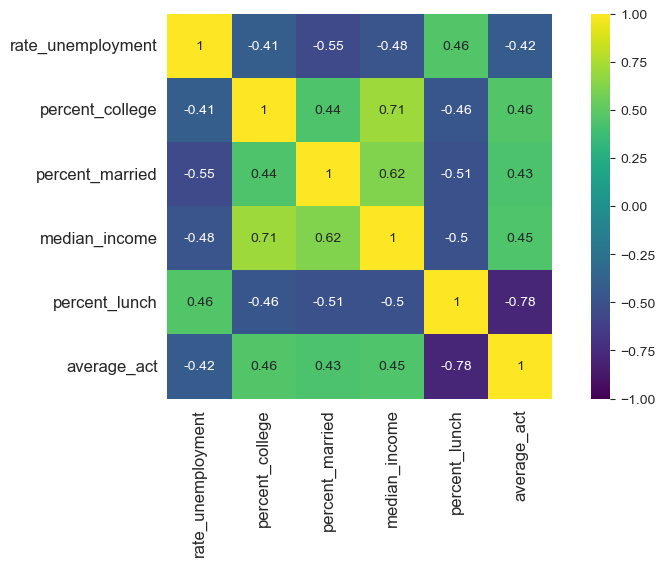

In [354]:
#plots correlation matrix of numerical variables in the training data to explore relationships between variables
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter', 'title_i_status']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ['average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis'
)

plt.tick_params(labelsize=12)

plt.show()

Based on the output, all numerical predictors have a non-zero correlation with average ACT scores. The magnitude is highest with ``percent_lunch``, implying that the percentage of students on free or reduced lunch is most highly correlated with ACT scores, in this case having a negative correlation. To better explore the magnitudes of the correlations and compare the categorical variables, statistical modeling will be necessary.

## Modeling

Given that there are multiple variables that have a relationship with ``average_act``, a multiple linear regression model will assist in further identifying the correlated variables and the strengths of their coefficients.

### Modeling with only numerical predictors

In [373]:
model = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch',
    data=df).fit()

In [374]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2226.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:31:55   Log-Likelihood:                -12302.
No. Observations:                6662   AIC:                         2.462e+04
Df Residuals:                    6656   BIC:                         2.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.8552      0.14

The following code defines a model identical to the one above, though with the variables ``percent_married`` and ``median_income`` omitted due to their statistical insignificance.

In [375]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch',
    data=df).fit()

The code below will provide a graphical assessment of the relationship between the predicted values of the model and the actual values.

In [376]:
y_hat = model_reduced.predict()

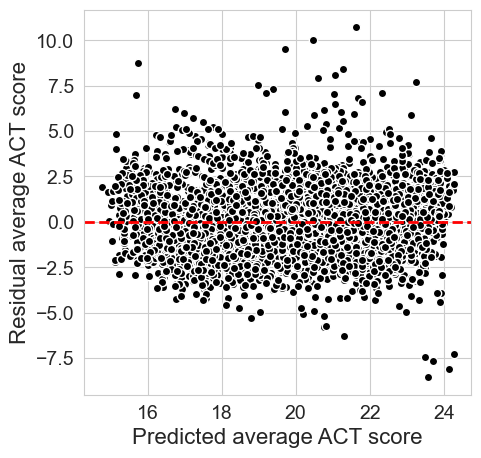

In [377]:
plt.figure(figsize=(5,5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

### Modeling with ``charter`` variable

The model below will establish a multiple linear regression model where the intercept and slope of the linear regression is variable depending on whether or not the school is a charter school.

In [378]:
model_charter1 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)', data=df).fit()

With the multiple linear regression model ``model_charter1``, an additional model ``model_charter2`` can be created from this first model. By importing the ``dmatrices`` command from the patsy library, a matrix can be designed with average ACT scores as the responding variable and the predictor variables as the explanatory variables. Predictor variables with a p-value of less than 0.05 (statistically significant) will be filtered for in this new model.

In [379]:
from patsy import dmatrices

In [380]:
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)',
                        data=df,
                        return_type='dataframe'
                        )

In [381]:
X = X_design.loc[:, model_charter1.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'C(charter)[T.Yes]', 'rate_unemployment',
       'rate_unemployment:C(charter)[T.Not applicable]',
       'rate_unemployment:C(charter)[T.Yes]', 'percent_college',
       'percent_college:C(charter)[T.Yes]', 'percent_lunch'],
      dtype='object')


In [382]:
model_charter2 = sm.OLS(y, X).fit()

In [383]:
print(model_charter2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1603.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:36:42   Log-Likelihood:                -12285.
No. Observations:                6662   AIC:                         2.459e+04
Df Residuals:                    6654   BIC:                         2.464e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

The two linear regression models can have their respective mean absolute errors computed. 

In [384]:
mean_absolute_error(df['average_act'], model_charter1.predict())

1.139256920070062

In [385]:
mean_absolute_error(df['average_act'], model_charter2.predict())

1.1428383870985077

Given the very minor difference in mean absolute error between the two models, one is not necessarily better than the other at modeling the multiple linear regression than the other.

### Modeling with ``title_i_status`` variable

The code below will repeat the process above with the ``title_i_status`` variable. 

In [386]:
model_title_i1 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(title_i_status)', data=df).fit()

In [387]:
from patsy import dmatrices

In [388]:
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(title_i_status)',
                        data=df,
                        return_type='dataframe'
                        )

In [389]:
X = X_design.loc[:, model_title_i1.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'C(title_i_status)[T.Title I schoolwide school]',
       'rate_unemployment:C(title_i_status)[T.Title I schoolwide school]',
       'percent_college',
       'percent_college:C(title_i_status)[T.Title I schoolwide school]',
       'percent_lunch',
       'percent_lunch:C(title_i_status)[T.Title I schoolwide school]'],
      dtype='object')


In [390]:
model_title_i2 = sm.OLS(y, X).fit()

In [391]:
mean_absolute_error(df['average_act'], model_title_i1.predict())

1.1401173406907157

In [392]:
mean_absolute_error(df['average_act'], model_title_i2.predict())

1.140109859364644

Again, given the very small difference in mean absolute error between the two models, one is not inherently the better model.

In [393]:
anova_lm(model_title_i1, model_title_i2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,6654.0,15442.396985,0.0,NaN,NaN,NaN
1,6655.0,15442.399913,-1.0,-0.002928,0.001262,NaN


Printing the summaries of each model will provide some additional insight between the models, specifically which predictor variables were not statistically significant.

In [394]:
print(model_title_i1.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1627.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:36:56   Log-Likelihood:                -12253.
No. Observations:                6662   AIC:                         2.452e+04
Df Residuals:                    6654   BIC:                         2.458e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [395]:
print(model_title_i2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1898.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:36:57   Log-Likelihood:                -12253.
No. Observations:                6662   AIC:                         2.452e+04
Df Residuals:                    6655   BIC:                         2.457e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The reduced model ``model_title_i2`` does notably exclude the ``rate_unemployment`` variable. This indicates that every other variable listed had a statistically significant coefficient relative to average ACT scores. However, given that all the remaining coefficients are statistically significant whether or not the school in question is a Title I school, there doesn't appear to be a major impact of this variable as a predictor for ACT scores.

## Scaling

The code below will scale the predictor variables in the reduced model to have a mean of 0 and a standard deviation of 1 and add them to the data frame.

In [396]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

In [397]:
scaled_columns = [var + '_normalized' for var in predictor_variables]

print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [398]:
scaler = StandardScaler().fit(df[predictor_variables])

In [399]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

There should now be scaled columns within the data frame for each of the three predictor variables.

The code below will check the mean and standard deviation of the transformed data.

In [400]:
df[scaled_columns].agg(['mean', 'std']).round(3)

,rate_unemployment_normalized,percent_college_normalized,percent_lunch_normalized
mean,0.0,0.0,0.0
std,1.0,1.0,1.0


The output shows that the predictor variables successfully now have means of 0 and standard deviations of 1.

The normalized predictor variables can now be used to fit a multiple linear regression model.

In [401]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

In [402]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3709.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:37:12   Log-Likelihood:                -12303.
No. Observations:                6662   AIC:                         2.461e+04
Df Residuals:                    6658   BIC:                         2.464e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The summary of the normalized model shows that each variable has a statistically significant coefficient. In terms of magnitude, however, the percent lunch variable has a coefficient of a much greater magnitude than the other two variables.

The mean absolute error and R-squared values of the normalized and reduced models can now be compared.

In [403]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
              'R-squared': [r2_full, r2_reduced]},
             index=['normalized model', 'reduced model']).round(4)

,Mean Absolute Error,R-squared
normalized model,1.1469,0.6257
reduced model,1.1469,0.6257


The output shows the mean absolute error and R-squared values are identical between the two models. This is because the transformation performed to create the normalized model did not change the linear regression model overall but just the coefficients. Given the greater significance of the percent_lunch_normalized, it can be stated that the percent of students receiving free or reduced price lunch was the strongest predictor in this analysis for a change in an ACT score.